https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
TIPO_DE_TRANSFORMACAO = 'standardization' #robust ou min_max

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('./Dados/apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')

/var/folders/nb/g07nvbm91ygftlxdl9zx17zw0000gn/T/ipykernel_52597/1208986380.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Dados/apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')


In [5]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [6]:
df.shape

(99492, 22)

# Remover colunas que não serão utilizadas

In [7]:
remover = ['id', 'title', 'body', 'currency', 'has_photo', 'price_display', 'address', 'price_type', 'source', 'time']

In [8]:
df.drop(remover, axis=1, inplace=True)

In [9]:
df.head()

,category,amenities,bathrooms,bedrooms,fee,pets_allowed,price,square_feet,cityname,state,latitude,longitude
0,housing/rent/apartment,NaN,1.0,1.0,No,Cats,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,housing/rent/apartment,NaN,1.5,3.0,No,"Cats,Dogs",1250.0,1500,Newport News,VA,37.0867,-76.4941
2,housing/rent/apartment,NaN,2.0,3.0,No,NaN,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,housing/rent/apartment,NaN,1.0,2.0,No,"Cats,Dogs",1600.0,820,Vacaville,CA,38.3622,-121.9712
4,housing/rent/apartment,NaN,1.0,1.0,No,"Cats,Dogs",975.0,624,Albuquerque,NM,35.1038,-106.6110


# Analisar dados nulos

In [10]:
df.isna().sum()

category            0
amenities       16044
bathrooms          63
bedrooms          124
fee                 0
pets_allowed    60424
price               1
square_feet         0
cityname          302
state             302
latitude           25
longitude          25
dtype: int64

# Remover colunas com alto índice de dados faltantes

In [11]:
df.drop('pets_allowed', axis=1, inplace=True)

In [12]:
df.head()

,category,amenities,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude
0,housing/rent/apartment,NaN,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,housing/rent/apartment,NaN,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,housing/rent/apartment,NaN,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,housing/rent/apartment,NaN,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,housing/rent/apartment,NaN,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110


# Remover demais dados nulos

In [13]:
df.dropna(inplace=True, ignore_index=True)

In [14]:
df.head()

,category,amenities,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude
0,housing/rent/apartment,"Fireplace,Gym,Parking,Pool,Storage,Wood Floors",1.0,1.0,No,1060.0,650,Austin,TX,30.3054,-97.7497
1,housing/rent/apartment,"Gated,Pool",1.0,1.0,No,1003.0,797,Round Rock,TX,30.5118,-97.6873
2,housing/rent/apartment,"Dishwasher,Parking,Pool",1.0,1.0,No,837.0,444,Austin,TX,30.3054,-97.7497
3,housing/rent/apartment,"Dishwasher,Parking,Pool",1.0,1.0,No,1020.0,692,Austin,TX,30.3054,-97.7497
4,housing/rent/apartment,"Gym,Pool",1.0,1.0,No,985.0,693,Austin,TX,30.3054,-97.7497


In [15]:
df[df['category'] != 'housing/rent/apartment'].head(10)

,category,amenities,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude
3474,housing/rent/home,"AC,Cable or Satellite,Dishwasher,Internet Acce...",1.0,2.0,No,625.0,828,Milledgeville,GA,33.0769,-83.3032
3475,housing/rent/home,"AC,Cable or Satellite,Internet Access,Patio/De...",1.0,1.0,No,475.0,664,Milledgeville,GA,33.0769,-83.3032
3831,housing/rent/short_term,"Gym,Internet Access,Pool,Washer Dryer",2.0,2.0,No,500.0,900,Bryan,TX,30.7084,-96.3470
8172,housing/rent,Parking,1.5,2.0,No,1250.0,1137,Newport News,VA,37.1451,-76.5397
39921,housing/rent/condo,"AC,Clubhouse,Gym,Parking,Pool",2.0,3.0,No,3380.0,1015,Westbury,NY,40.7567,-73.5776
39967,housing/rent/condo,"AC,Fireplace,Patio/Deck",2.0,2.0,No,650.0,1061,Little Rock,AR,34.7264,-92.3480
40212,housing/rent/other,"AC,Parking,Washer Dryer",1.0,3.0,No,1275.0,1100,Saint Paul,MN,44.9405,-93.1027
40215,housing/rent/home,"AC,Cable or Satellite,Dishwasher,Fireplace,Gar...",2.0,3.0,No,2000.0,942,San Jose,CA,37.3108,-121.8645
40230,housing/rent/home,Washer Dryer,1.0,2.0,No,1450.0,950,Charleston,SC,32.8113,-79.9947
40273,housing/rent/condo,"Dishwasher,Elevator,Fireplace,Garbage Disposal...",1.0,0.0,No,1925.0,436,Seattle,WA,47.6160,-122.3275


In [16]:
df.shape

(83166, 11)

In [17]:
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

In [18]:
df['amenities'].unique()

array(['Fireplace,Gym,Parking,Pool,Storage,Wood Floors', 'Gated,Pool',
       'Dishwasher,Parking,Pool', ..., 'Dishwasher,Doorman',
       'AC,Elevator,Parking,Patio/Deck,Pool,Washer Dryer',
       'Dishwasher,Doorman,Patio/Deck,Refrigerator,Storage,Washer Dryer,Wood Floors'],
      dtype=object)

# Criar colunas contendo as categorias dos aluguéis

In [19]:
values_list = []
for index, row in df[['category']].iterrows():
    values_list.append(row.iloc[0].split('/'))

In [20]:
df_category = pd.DataFrame(values_list)

In [21]:
df_category.head()

,0,1,2,3
0,housing,rent,apartment,None
1,housing,rent,apartment,None
2,housing,rent,apartment,None
3,housing,rent,apartment,None
4,housing,rent,apartment,None


**As colunas 0 e 1 repetem suas respectivas informações em todas as linhas o que as torna desnecessárias.**

In [22]:
df_category[2].unique()

array(['apartment', 'home', 'short_term', None, 'condo', 'other',
       'commercial'], dtype=object)

In [23]:
df_category.fillna({3:'Nothing'}, inplace=True)

# Converter as colunas 2 e 3 utilizando OneHotEncoding

In [24]:
df_category = pd.get_dummies(df_category[[2, 3]], drop_first=True, dtype=int)

In [25]:
for column in df_category.columns:
    if '2' in column:
        df_category.rename(columns={column:column.replace('2', 'category')}, inplace=True)
    else:
        df_category.rename(columns={column:column.replace('3', 'category')}, inplace=True)


# Juntar os dataframes e remover as colunas category e amenities

In [26]:
df = pd.concat([df, df_category], axis=1)
df.drop(['category', 'amenities'], axis=1, inplace=True)

In [27]:
df.head()

,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail
0,1.0,1.0,No,1060.0,650,Austin,TX,30.3054,-97.7497,0,0,0,0,0,0
1,1.0,1.0,No,1003.0,797,Round Rock,TX,30.5118,-97.6873,0,0,0,0,0,0
2,1.0,1.0,No,837.0,444,Austin,TX,30.3054,-97.7497,0,0,0,0,0,0
3,1.0,1.0,No,1020.0,692,Austin,TX,30.3054,-97.7497,0,0,0,0,0,0
4,1.0,1.0,No,985.0,693,Austin,TX,30.3054,-97.7497,0,0,0,0,0,0


# Fazer a codificação das cidades e dos estados com base na frequência em que aparecem ao longo dos registros

In [28]:
city_counts = df['cityname'].value_counts()
df['city_freq_encoded'] = df['cityname'].map(city_counts)

city_counts = df['state'].value_counts()
df['state_freq_encoded'] = df['state'].map(city_counts)

df.drop(['cityname', 'state'], axis=1, inplace=True)

In [29]:
df.head()

,bathrooms,bedrooms,fee,price,square_feet,latitude,longitude,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail,city_freq_encoded,state_freq_encoded
0,1.0,1.0,No,1060.0,650,30.3054,-97.7497,0,0,0,0,0,0,342,9539
1,1.0,1.0,No,1003.0,797,30.5118,-97.6873,0,0,0,0,0,0,22,9539
2,1.0,1.0,No,837.0,444,30.3054,-97.7497,0,0,0,0,0,0,342,9539
3,1.0,1.0,No,1020.0,692,30.3054,-97.7497,0,0,0,0,0,0,342,9539
4,1.0,1.0,No,985.0,693,30.3054,-97.7497,0,0,0,0,0,0,342,9539


In [30]:
df.shape

(83166, 15)

# Converter a coluna fee em formato binário

In [31]:
df['fee'] = pd.get_dummies(df['fee'], drop_first=True, dtype=int)

In [32]:
df.head()

,bathrooms,bedrooms,fee,price,square_feet,latitude,longitude,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail,city_freq_encoded,state_freq_encoded
0,1.0,1.0,0,1060.0,650,30.3054,-97.7497,0,0,0,0,0,0,342,9539
1,1.0,1.0,0,1003.0,797,30.5118,-97.6873,0,0,0,0,0,0,22,9539
2,1.0,1.0,0,837.0,444,30.3054,-97.7497,0,0,0,0,0,0,342,9539
3,1.0,1.0,0,1020.0,692,30.3054,-97.7497,0,0,0,0,0,0,342,9539
4,1.0,1.0,0,985.0,693,30.3054,-97.7497,0,0,0,0,0,0,342,9539


# Correlação entre as variáveis

<Axes: >

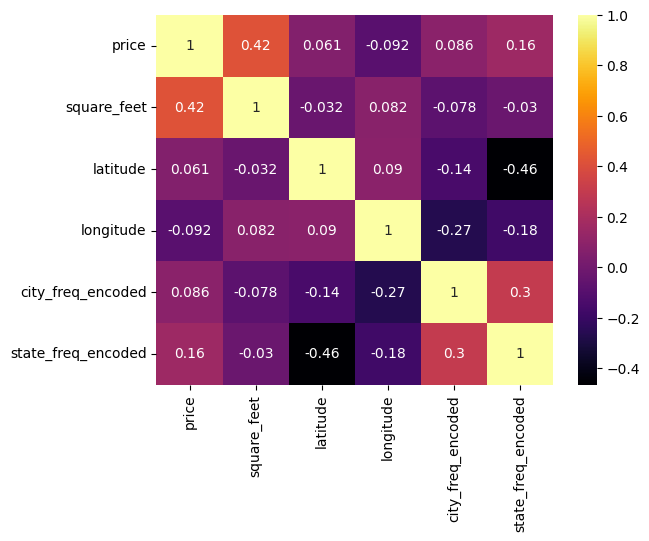

In [33]:
sns.heatmap(df[['price', 'square_feet', 'latitude', 'longitude', 'city_freq_encoded', 'state_freq_encoded']].corr(), cmap='inferno', annot=True)

# Visão geral dos dados em pares

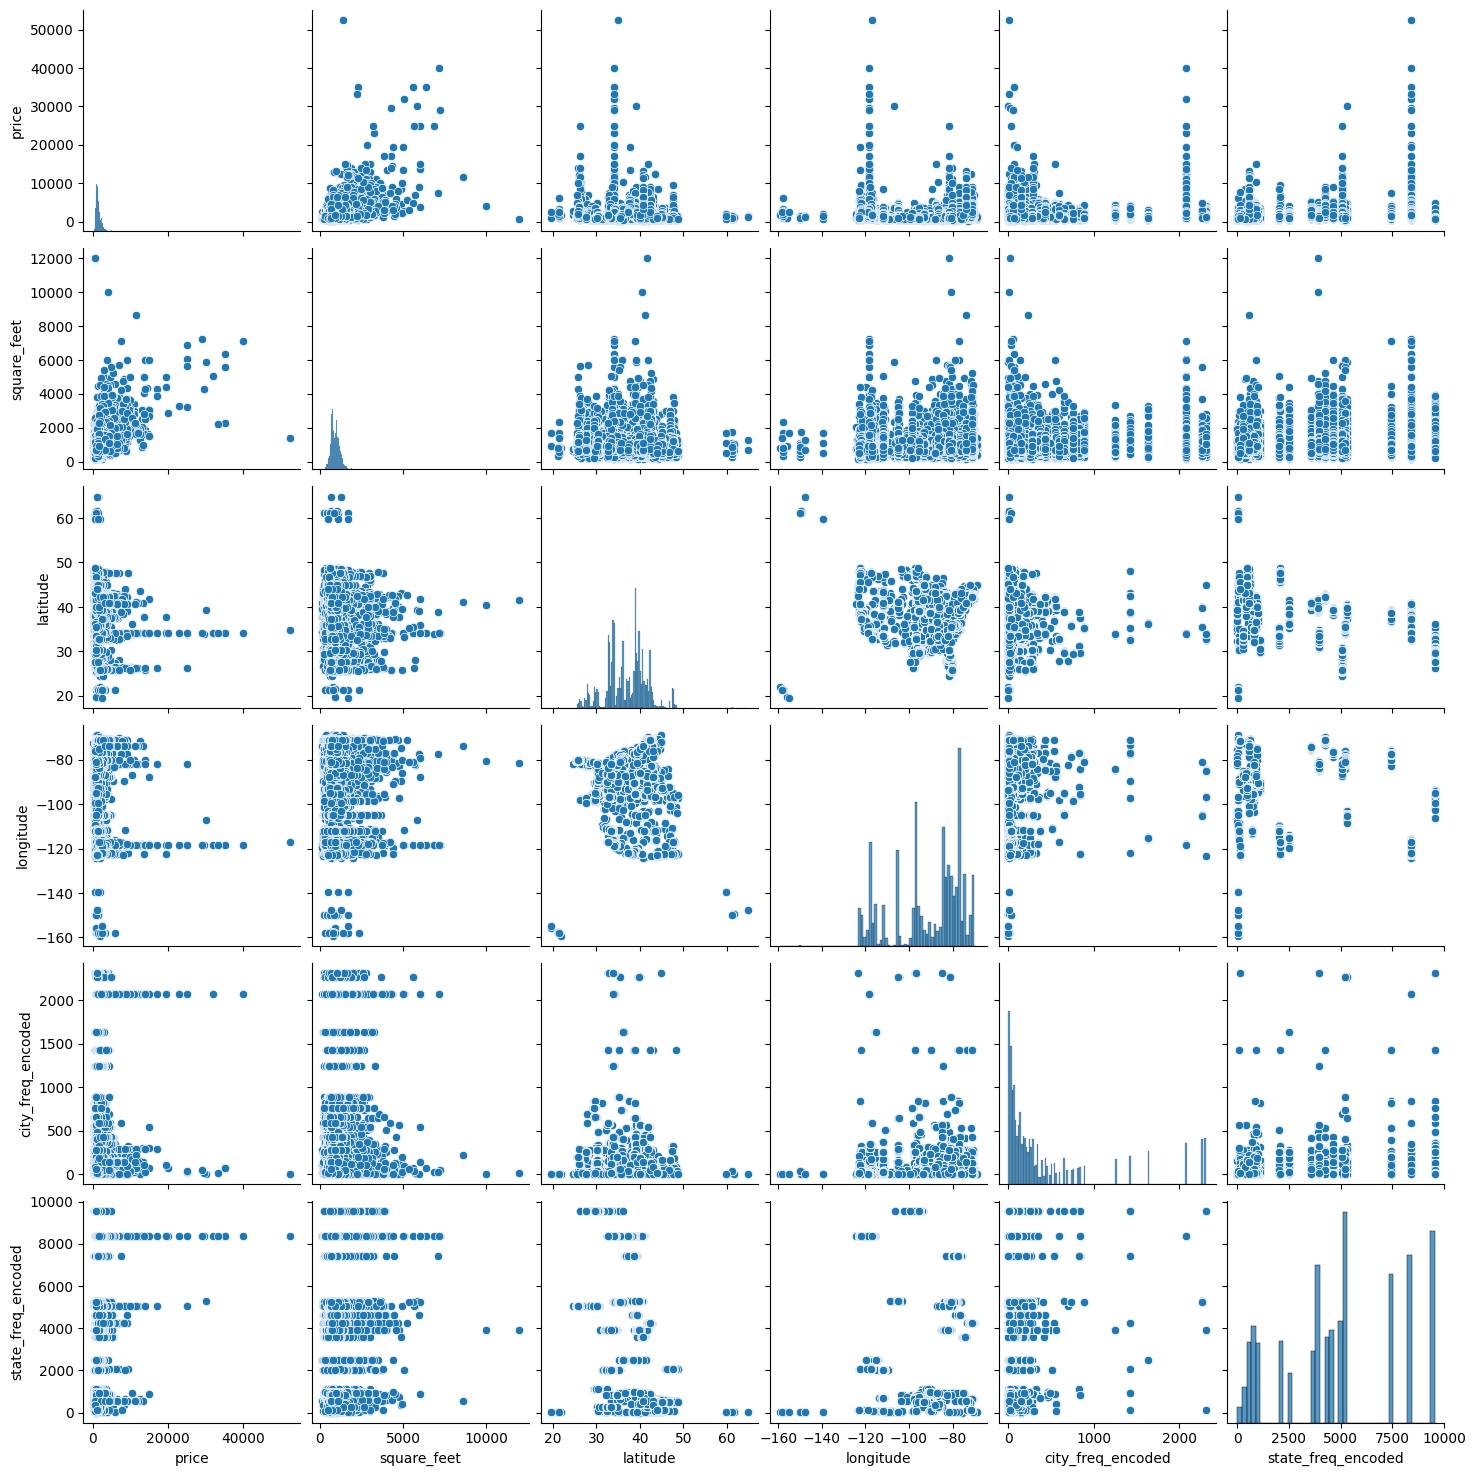

In [34]:
sns.pairplot(df[['price', 'square_feet', 'latitude', 'longitude', 'city_freq_encoded', 'state_freq_encoded']])

# Separar os dados em treino e teste

In [35]:
X = df.drop('price', axis=1).copy()
y = df['price'].copy()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [37]:
X_train.head()

,bathrooms,bedrooms,fee,square_feet,latitude,longitude,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail,city_freq_encoded,state_freq_encoded
0,2.0,3.0,0,1366,35.7238,-78.8695,0,0,0,0,0,0,169,5226
1,2.0,2.0,0,1242,35.2205,-80.9289,0,0,0,0,0,0,890,5226
2,2.0,2.0,0,1011,32.7767,-97.0816,0,0,0,0,0,0,1423,9539
3,1.0,1.0,0,700,42.3280,-71.0710,0,0,0,0,0,0,429,4259
4,2.5,2.0,0,1550,39.2735,-76.8674,0,0,0,0,0,0,95,4643


In [38]:
X_test.head()

,bathrooms,bedrooms,fee,square_feet,latitude,longitude,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail,city_freq_encoded,state_freq_encoded
0,1.0,1.0,0,730,29.5450,-95.3293,0,0,0,0,0,0,20,9539
1,1.0,1.0,0,677,39.7399,-104.7919,0,0,0,0,0,0,288,5293
2,2.0,2.0,0,1222,47.6829,-122.1209,0,0,0,0,0,0,113,2047
3,1.0,1.0,0,725,33.9373,-84.2004,0,0,0,0,0,0,50,3937
4,1.0,2.0,0,1190,41.4983,-81.6437,0,0,0,0,0,0,482,3914


In [39]:
y_train.head()

0    1580.0
1    1060.0
2    1239.0
3    2900.0
4    2645.0
Name: price, dtype: float64

In [40]:
y_test.head()

0    1005.0
1    1520.0
2    3195.0
3     792.0
4     965.0
Name: price, dtype: float64

In [41]:
print(f'X treino shape: {X_train.shape}')
print(f'X teste shape: {X_test.shape}')
print(f'y treino shape: {y_train.shape}')
print(f'y teste shape: {y_test.shape}')

X treino shape: (58216, 14)
X teste shape: (24950, 14)
y treino shape: (58216,)
y teste shape: (24950,)


# Aplicar transformação aos dados

In [42]:
if TIPO_DE_TRANSFORMACAO == 'standardization':
    scaler = StandardScaler()
elif TIPO_DE_TRANSFORMACAO == 'min_max':
    scaler = MinMaxScaler()
else:
    scaler = RobustScaler()

**Remover as colunas categóricas antes de transformar. Essas colunas já foram convertidas em 0 e 1 e não precisam de nenhuma nova transformação**

In [43]:
df_category.columns

Index(['category_commercial', 'category_condo', 'category_home',
       'category_other', 'category_short_term', 'category_retail'],
      dtype='object')

In [44]:
remove_columns = list(df_category.columns)+['fee']

data_train = scaler.fit_transform(X_train.drop(remove_columns, axis=1))
X_train_transformed = pd.DataFrame(data=data_train, columns=X_train.drop(remove_columns, axis=1).columns)
X_train_transformed = pd.concat([X_train_transformed, X_train[remove_columns]], axis=1)

data_test = scaler.transform(X_test.drop(remove_columns, axis=1))
X_test_transformed = pd.DataFrame(data=data_test, columns=X_test.drop(remove_columns, axis=1).columns)
X_test_transformed = pd.concat([X_test_transformed, X_test[remove_columns]], axis=1)

# Exibir dados transformados

In [45]:
X_train_transformed.head()

,bathrooms,bedrooms,square_feet,latitude,longitude,city_freq_encoded,state_freq_encoded,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail,fee
0,1.037418,1.773435,1.216446,-0.251625,0.788956,-0.431770,0.118755,0,0,0,0,0,0,0
1,1.037418,0.391139,0.853555,-0.361594,0.657723,0.716146,0.118755,0,0,0,0,0,0,0
2,1.037418,0.391139,0.177523,-0.895558,-0.371592,1.564744,1.616850,0,0,0,0,0,0,0
3,-0.829774,-0.991157,-0.732631,1.191374,1.285908,-0.017819,-0.217127,0,0,0,0,0,0,0
4,1.971013,0.391139,1.754929,0.523975,0.916538,-0.549586,-0.083747,0,0,0,0,0,0,0


In [46]:
X_test_transformed.head()

,bathrooms,bedrooms,square_feet,latitude,longitude,city_freq_encoded,state_freq_encoded,category_commercial,category_condo,category_home,category_other,category_short_term,category_retail,fee
0,-0.829774,-0.991157,-0.644835,-1.601675,-0.259928,-0.668995,1.616850,0,0,0,0,0,0,0
1,-0.829774,-0.991157,-0.799941,0.625882,-0.862923,-0.242308,0.142027,0,0,0,0,0,0,0
2,1.037418,0.391139,0.795024,2.361405,-1.967197,-0.520928,-0.985452,0,0,0,0,0,0,0
3,-0.829774,-0.991157,-0.659467,-0.641970,0.449250,-0.621231,-0.328971,0,0,0,0,0,0,0
4,-0.829774,0.391139,0.701374,1.010087,0.612173,0.066563,-0.336960,0,0,0,0,0,0,0


# Treinar os modelos

**Aqui foi criada uma lista com diversos modelos a serem testados. O laço de repetição permite treinar todos os modelos e seus respectivos resultados são salvos**

In [47]:
lista_de_modelos = [Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(random_state=0), 
                    RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), XGBRegressor(random_state_=0)]

df_results = pd.DataFrame(columns=['Modelo', 'r2 treino', 'r2 teste', 'mape treino', 'mape teste'])

all_y_values = {}

results_index = 0

for modelo in tqdm(lista_de_modelos):

    model_name = type(modelo).__name__

    modelo.fit(X_train_transformed, y_train)
    y_pred_train = modelo.predict(X_train_transformed)
    y_pred_test = modelo.predict(X_test_transformed)

    all_y_values[model_name] = {}
    all_y_values[model_name]['y_pred_train'] = y_pred_train
    all_y_values[model_name]['y_pred_test'] = y_pred_test
    
    r2_train = r2_score(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

    r2_test = r2_score(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    df_results.loc[results_index, 'Modelo'] = model_name
    df_results.loc[results_index, 'r2 treino'] = np.round(r2_train,4)
    df_results.loc[results_index, 'r2 teste'] = np.round(r2_test,4)
    df_results.loc[results_index, 'mape treino'] = np.round(mape_train,4)
    df_results.loc[results_index, 'mape teste'] = np.round(mape_test,4)
    
    results_index += 1

df_results.sort_values(by='r2 teste', ascending=False, inplace=True, ignore_index=True)
#df_results.to_excel('./Results/all_results.xlsx', engine='openpyxl', index=False)

 86%|████████▌ | 6/7 [00:16<00:03,  3.98s/it]/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:26:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "random_state_" } are not used.

  warnings.warn(smsg, UserWarning)
100%|██████████| 7/7 [00:16<00:00,  2.34s/it]


# Tabela apresentando os resultados dos modelos

In [48]:
df_results

,Modelo,r2 treino,r2 teste,mape treino,mape teste
0,RandomForestRegressor,0.9666,0.7646,0.0463,0.1095
1,XGBRegressor,0.8938,0.734,0.135,0.1441
2,DecisionTreeRegressor,0.9958,0.688,0.0126,0.129
3,GradientBoostingRegressor,0.7217,0.6379,0.1986,0.1978
4,Ridge,0.2603,0.2581,0.3301,0.329
5,Lasso,0.2596,0.2578,0.3298,0.3285
6,ElasticNet,0.2205,0.2156,0.3399,0.3397


# Obter o melhor modelo

**O critério de avaliação aqui é escolher o modelo que obtém o r2 mais alto no conjunto de teste**

**Como a tabela acima df_results já está ordenada do maior para o menor basta escolher o elemento da primeira linha**

In [49]:
best_model_name = df_results.loc[0, 'Modelo']
best_model_r2 = df_results.loc[0, 'r2 teste']
for modelo in lista_de_modelos:
    if type(modelo).__name__ == df_results.loc[0, 'Modelo']:
        best_model = modelo

# Gráfico comparando os valores preditos pelo melhor modelo e os valores reais

**Obter os valores de y de treino e teste para fazer os gráficos**

In [50]:
y_pred_train_best = all_y_values[best_model_name]['y_pred_train']
y_pred_test_best = all_y_values[best_model_name]['y_pred_test']

**Devido ao fato de ser um conjunto de dados grande, fazer o gráfico de todos os pontos deixa o gráfico muito poluído e pouco explicativo e por isso apenas os 100 últimos valores serão colocados no gráfico**

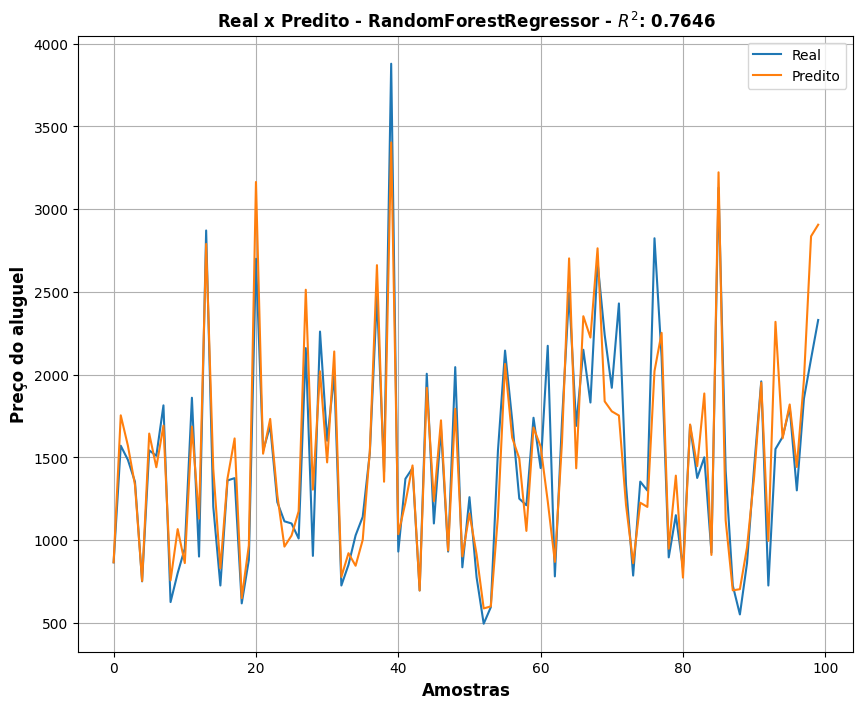

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(y_test.iloc[-100:].values)
plt.plot(y_pred_test_best[-100:])
plt.title(f'Real x Predito - {best_model_name} - $R^2$: {best_model_r2}', fontsize=12, fontweight='bold')
plt.xlabel('Amostras', fontsize=12, fontweight='bold')
plt.ylabel('Preço do aluguel', fontsize=12, fontweight='bold')
plt.legend(['Real', 'Predito'])
plt.grid()

# Avaliar a importância das variáveis no modelo

**Essa medida de importância é dada por valores calculados pelo modelo (parâmetros)**

In [52]:
for modelo in lista_de_modelos:

    model_name = type(modelo).__name__

    if model_name == best_model_name:
        if model_name == 'DecisionTreeRegressor' or model_name == 'RandomForestRegressor' or model_name == 'GradientBoostingRegressor' or model_name == 'XGBRegressor':
            importancia_das_variaveis = np.round(modelo.feature_importances_,3)
            nome_das_variaveis = modelo.feature_names_in_
        else:
            importancia_das_variaveis = np.round(modelo.coef_,3)
            nome_das_variaveis = modelo.feature_names_in_
        break

In [53]:
df_importancia = pd.DataFrame({'Variável':nome_das_variaveis, 'Importância':importancia_das_variaveis})
df_importancia.sort_values(by='Importância', ascending=False, ignore_index=True, inplace=True)

**A tabela abaixo apresenta a importância de cada variável já ordenadas da maior para a menor**

In [54]:
df_importancia

,Variável,Importância
0,longitude,0.314
1,square_feet,0.282
2,latitude,0.141
3,bathrooms,0.116
4,bedrooms,0.068
5,city_freq_encoded,0.057
6,state_freq_encoded,0.021
7,category_commercial,0.000
8,category_condo,0.000
9,category_home,0.000


# Gráfico de barras apresentando a importância das variáveis

Text(0, 0.5, 'Variável')

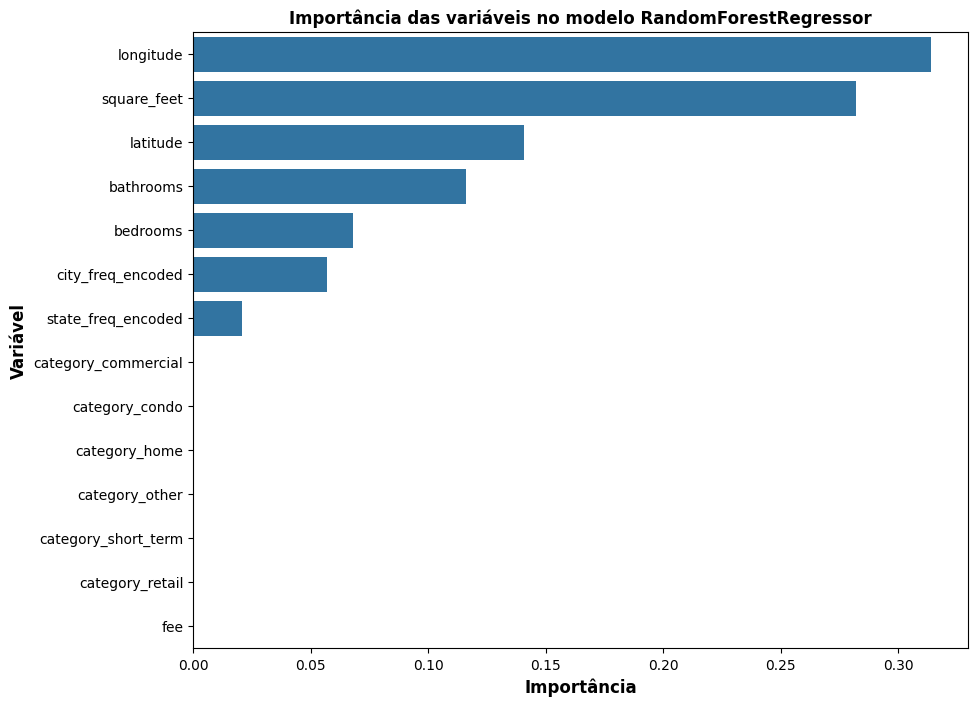

In [55]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_importancia, x='Importância', y='Variável')
plt.title(f'Importância das variáveis no modelo {best_model_name}', fontsize=12, fontweight='bold')
plt.xlabel('Importância', fontsize=12, fontweight='bold')
plt.ylabel('Variável', fontsize=12, fontweight='bold')

# Aplicar o melhor modelo treinado aos dados de validação

## Criar classes para construir o pipeline

In [56]:
class FitBypasser(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.transformer.transform(X)

In [57]:
class CategoryColumnConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.values_list = []
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for index, row in X[['category']].iterrows():
            self.values_list.append(row.iloc[0].split('/'))
        X_category = pd.DataFrame(self.values_list)

        df_category = pd.get_dummies(X_category[[2]], drop_first=True, dtype=int)
        
        for column in df_category.columns:
            df_category.rename(columns={column:column.replace('2', 'category')}, inplace=True)
        
        return df_category

In [58]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.drop(columns=self.columns_to_drop, axis=1, inplace=True)
        return X.dropna(inplace=True, ignore_index=True)

In [59]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column_names_list):
        self.column_names_list = column_names_list

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for column_name in self.column_names_list:
            column_counts = X[column_name].value_counts()
            X[f'{column_name}_encoded'] = X[column_name].map(column_counts)
        X.drop(self.column_names_list, axis=1, inplace=True)
        return X

In [60]:
df_validacao = pd.read_csv('./Dados/apartments_for_rent_classified_10K.csv', sep=";", encoding='cp1252')

In [61]:
df_validacao.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
